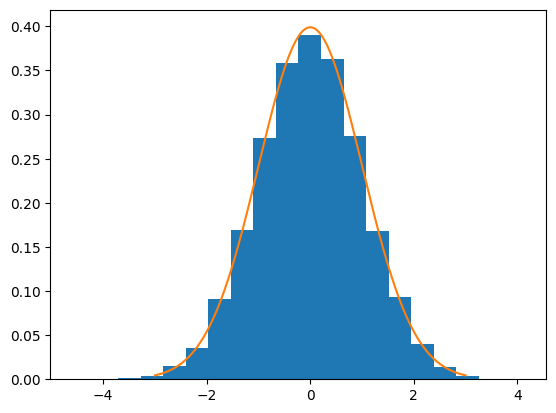

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

def random_coin(p):
    unif = random.uniform(0,1)
    if unif > p:
        return False
    else:
        return True
    
def normal(x, mu, sigma):
    numerator = np.exp((-(x-mu)**2/(2*sigma**2)))
    denominator = sigma * np.sqrt(2*np.pi)
    return numerator/denominator
    
def gaussian_mcmc(hops, mu, sigma):
    states = []
    burn_in = int(hops*0.2)
    current = random.uniform(-5*sigma+mu,5*sigma+mu)
    for i in range(hops):
        states.append(current)
        movement = random.uniform(-5*sigma+mu, 5*sigma+mu)

        curr_prob = normal(x=current, mu=mu, sigma=sigma)
        move_prob = normal(x=movement, mu=mu, sigma=sigma)

        acceptance = min(move_prob/curr_prob,1)
        if random_coin(acceptance):
            current = movement

    return states[burn_in:]

lines = np.linspace(-3,3,1000)
normal_curve = [normal(l,mu=0,sigma=1) for l in lines]
dist = gaussian_mcmc(100_000, mu=0, sigma=1)
plt.hist(dist, density=1, bins=20)
plt.plot(lines, normal_curve)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

def random_coin(p):
    unif = random.uniform(0,1)
    if unif > p:
        return False
    else:
        return True
    
def boltzman(e):
    K = 1.3806*(10**(-23)) 
    T = 100
    return np.exp(-(e)/K*T)

def boltzman_mcmc(hops, eA, eB):
    states = []
    burn_in = int(hops*0.2)
    current = random.uniform(-5*sigma+mu,5*sigma+mu)
    for i in range(hops):
        states.append(current)
        movement = random.uniform(-5*sigma+mu, 5*sigma+mu)

        curr_prob = boltzman(x=current, mu=mu, sigma=sigma)
        move_prob = boltzman(x=movement, mu=mu, sigma=sigma)

        acceptance = min(move_prob/curr_prob,1)
        if random_coin(acceptance):
            current = movement

    return states[burn_in:]

lines = np.linspace(-3,3,1000)
normal_curve = [normal(l,mu=0,sigma=1) for l in lines]
dist = gaussian_mcmc(100_000, mu=0, sigma=1)
plt.hist(dist, density=1, bins=20)
plt.plot(lines, normal_curve)